# jet systematics

Given the analysis requires at least two jets and is binned in the number of b tags, the effect of uncertainties of the jets on the branching fractions should be considered.  The main sources to consider are:

   * jet energy scale
   * jet energy resolution
   * b tag efficiency scale factor
   * mistag efficiency scale factors
   
The first two uncertainty sources affect the overall number of events that are accepted, whereas all of these will cause migration between b tag multiplicity bins.  This is obviously the case for the efficiency scale factors; the jet energy uncertainty impacts the b tag multiplicity due to the pt dependence of the scale factors.

In [1]:
# imports and configuration
%cd /home/naodell/work/wbr/analysis

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('default')

import scripts.plot_tools as pt
import scripts.systematic_tools as st
from scripts.blt_reader import jec_source_names

pt.set_default_style()
%connect_info

/home/naodell/work/wbr/analysis
Welcome to JupyROOT 6.14/04
{
  "shell_port": 40181,
  "iopub_port": 49671,
  "stdin_port": 59069,
  "control_port": 46943,
  "hb_port": 47435,
  "ip": "127.0.0.1",
  "key": "fe49a245-290e01f271778ed2a5b7b29b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-115b7068-8e68-4760-b4bd-f7c916545acc.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
# Get the data (unbinned)
### get the data and prepare labels

selection = 'e4j'
dm = pt.DataManager(input_dir     = f'local_data/flatuples/new_jes_syst/{selection}_2016',
                    dataset_names = ['ttbar_inclusive'],
                    selection     = selection,
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = pt.cuts[selection]
                   )

df = dm.get_dataframe('ttbar')

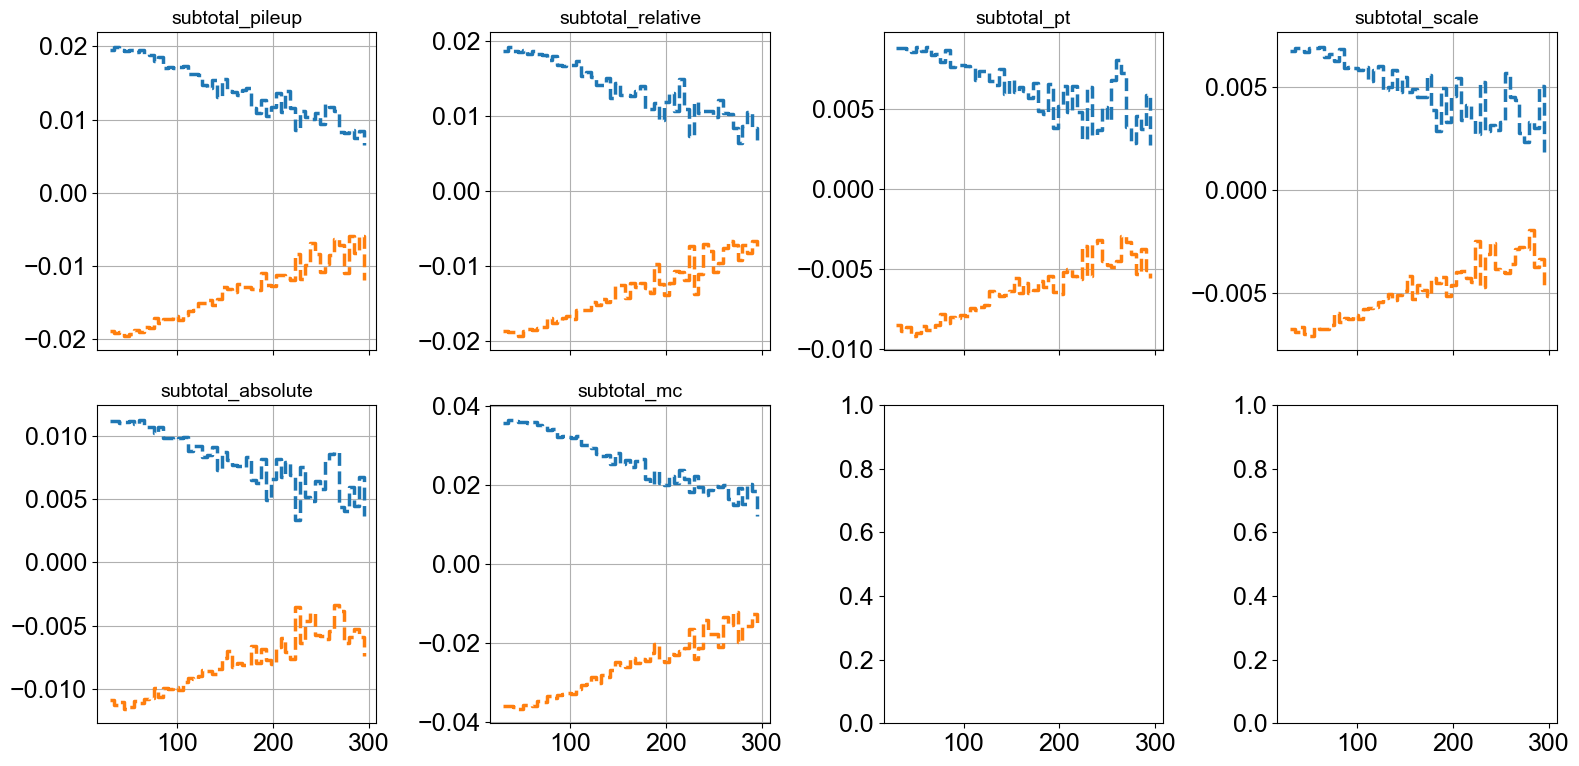

In [3]:
# make plots of the jet multiplicity for JES 
fig, axes = plt.subplots(2, 4, figsize=(16, 8), facecolor='white', sharey=False, sharex='col')
#fig.subplots_adjust(top=0.9)
#fig.suptitle(f'{selection}')


bins = np.linspace(30, 300, 54)
feature = 'lepton1_pt'
count = 0
subtotal_names = [c for c in jec_source_names if 'subtotal' in c]
for ix, name in enumerate(subtotal_names):
    
    ax = axes[ix//4, ix%4]
    h_nominal, _ = np.histogram(df.query('n_jets >= 4')[feature], bins=bins)
    h_up, _      = np.histogram(df.query(f'n_jets_jes_{name}_up >= 4')[feature], bins=bins)
    h_down, _    = np.histogram(df.query(f'n_jets_jes_{name}_down >= 4')[feature], bins=bins)
    
    ax.plot(bins[:-1], (h_up - h_nominal)/h_nominal, 'C0--', drawstyle='steps-post')
    ax.plot(bins[:-1], (h_down - h_nominal)/h_nominal, 'C1--', drawstyle='steps-post')
    #ax.set_yscale('log')
    ax.set_title(name, fontsize=14)
    #ax.set_ylim(5e-4, 2.)
    ax.grid()
    
plt.tight_layout()
plt.savefig(f'plots/systematics/{selection}_njets_jes.pdf')
plt.show()

In [4]:
# build correlation matrix
jet_col = [c for c in df.columns if 'n_jets' in c]
df_jet = df[jet_col]
df_pass = (df_jet >= 4)
df_pass.sum(axis=0)/df_pass['n_jets'].sum()

n_jets                               1.000000
n_jets_jer_down                      0.998426
n_jets_jer_up                        1.002260
n_jets_jes_abs_flav_map_down         1.000000
n_jets_jes_abs_flav_map_up           1.000000
n_jets_jes_abs_mpf_bias_down         0.995547
n_jets_jes_abs_mpf_bias_up           1.004420
n_jets_jes_abs_scale_down            0.996672
n_jets_jes_abs_scale_up              1.003302
n_jets_jes_abs_stat_down             0.996963
n_jets_jes_abs_stat_up               1.003020
n_jets_jes_flavor_qcd_down           0.975186
n_jets_jes_flavor_qcd_up             1.024637
n_jets_jes_fragmentation_down        0.995549
n_jets_jes_fragmentation_up          1.004424
n_jets_jes_pileup_data_mc_down       0.993532
n_jets_jes_pileup_data_mc_up         1.006470
n_jets_jes_pileup_pt_bb_down         0.995380
n_jets_jes_pileup_pt_bb_up           1.004581
n_jets_jes_pileup_pt_ec1_down        0.991268
n_jets_jes_pileup_pt_ec1_up          1.008932
n_jets_jes_pileup_pt_ref_down     